# First Project var1 E-commerce Kuchiev A.A

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 
 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)
 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)
 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать,
    что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. 
    И внутри метрики это нужно учесть. (8 баллов) 
 5. Используя pandas, проведи когортный анализ пользователей. 
    В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 
 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
    Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
    В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты,
    F - суммарное количество покупок у пользователя за всё время, 
    M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. 
    Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
    Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500   дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

 Описание данных:
    
1. olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
    - customer_id — позаказный идентификатор пользователя
    - customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
    - customer_zip_code_prefix —  почтовый индекс пользователя
    - customer_city —  город доставки пользователя
    - customer_state —  штат доставки пользователя


2. olist_orders_dataset.csv —  таблица заказов
    - order_id —  уникальный идентификатор заказа (номер чека)
    - customer_id —  позаказный идентификатор пользователя
    - order_status —  статус заказа
    - order_purchase_timestamp —  время создания заказа
    - order_approved_at —  время подтверждения оплаты заказа
    - order_delivered_carrier_date —  время передачи заказа в логистическую службу
    - order_delivered_customer_date —  время доставки заказа
    - order_estimated_delivery_date —  обещанная дата доставки


3. olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
    - order_id —  уникальный идентификатор заказа (номер чека)
    - order_item_id —  идентификатор товара внутри одного заказа
    - product_id —  ид товара (аналог штрихкода)
    - seller_id — ид производителя товара
    - shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
    - price —  цена за единицу товара
    - freight_value —  вес товара

____

In [143]:
# Иморт необходимых библеотек 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set(
        style="whitegrid",
        rc={'figure.figsize':(16,8)}
        )

In [144]:
# Подгружаем датасет с пользователями
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/F/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [145]:
# Посмотрим информацию о датафрейме
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [146]:
# Проверим есть ли пустые значения
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [147]:
# Проверяем есть ли повторяющиеся значения
customers.duplicated().sum()

0

In [148]:
# Еще немного информации о датафрейме 
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,be2cefe1adaced8bb0a0b41a1bae24d7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [149]:
customers.customer_state.nunique()

27

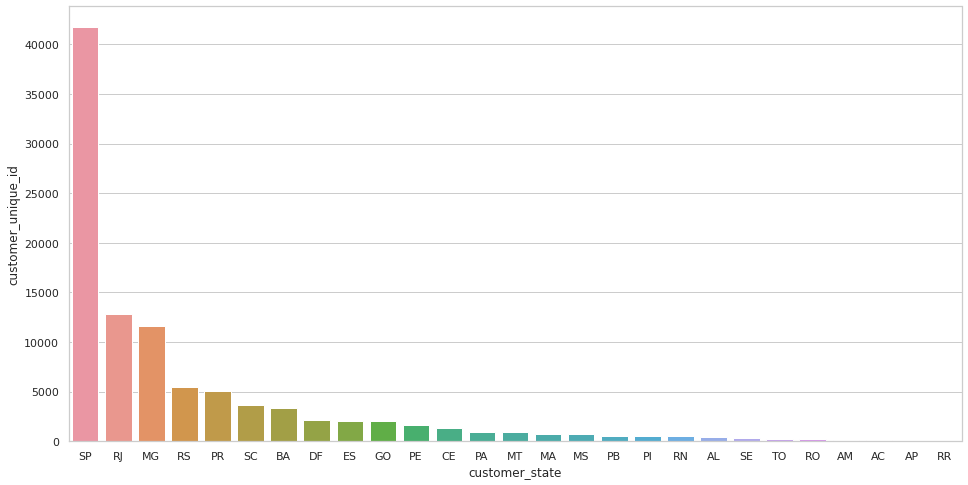

In [150]:
# Посмотрим на распределине покупателей по штатам
cust_per_city = customers.\
                groupby('customer_state', as_index = False).\
                agg({'customer_unique_id':'count'}).\
                sort_values('customer_unique_id', ascending=False)

sns.barplot(data=cust_per_city, x='customer_state', y='customer_unique_id');


In [151]:
# Загружаем датасет с заказами и сразу парсим колонки с датами
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/F/olist_orders_dataset.csv',\
                     parse_dates=['order_purchase_timestamp','order_approved_at',
                                  'order_delivered_carrier_date','order_delivered_customer_date',
                                  'order_estimated_delivery_date'])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [152]:
# Смотрим инфо о датасете
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [153]:
# Проверяем пустые значения 
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

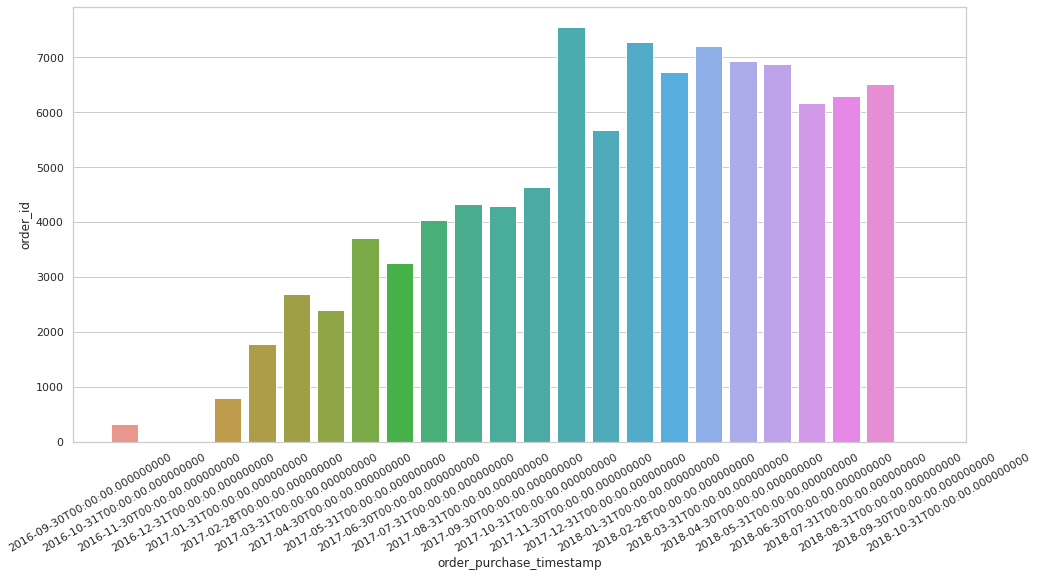

In [154]:
# Посмотрим на распределение созданий заказов по месяцам
ord_distrib = orders\
                    .set_index('order_purchase_timestamp')\
                    .resample(rule='M')\
                    .agg({'order_id':'count'})\
                    .reset_index()

#plt.figure(figsize=(16,6))
plt.xticks(rotation='30')
sns.set_style(style='whitegrid')
sns.barplot(data = ord_distrib, x = 'order_purchase_timestamp', y = 'order_id')

In [155]:
# Посмотрим как распределяются наши заказы по статусам
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

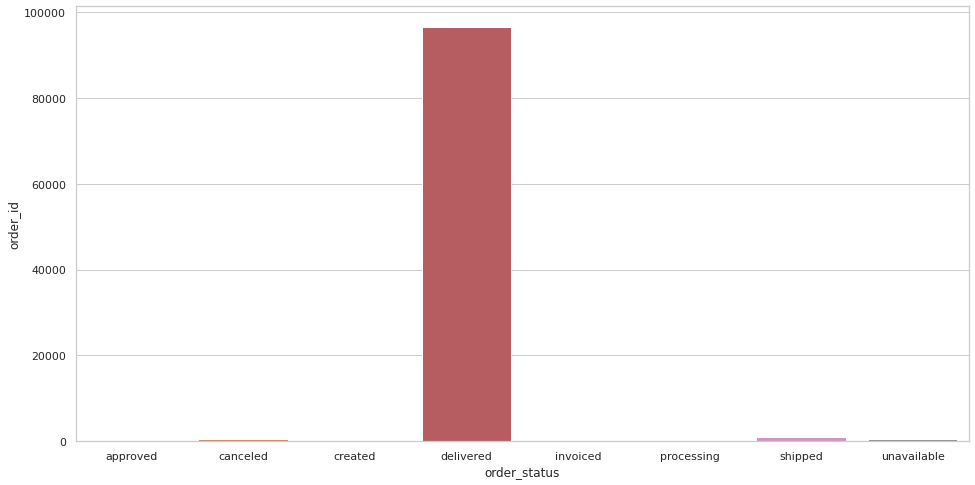

In [156]:
orders_per_status = orders.\
                    groupby('order_status',as_index=False).\
                    agg({'order_id':'count'})

sns.barplot(data = orders_per_status, x='order_status', y='order_id');


In [157]:
# Загружаем данные о позициях в заказах и парсим колонку с датой
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/F/olist_order_items_dataset.csv',\
                         parse_dates=['shipping_limit_date'])
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [158]:
# Инфо о данных
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [159]:
# Посмотрим немного описательной статистки по числовым колонкам 
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [160]:
# Смотрим есть ли пропущенные значения
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

####   ЗАДАНИЕ 1
 Сколько у нас пользователей, которые совершили покупку только один раз?
 Давайте определимся,что будем считать покупкой? Рассуждая логически - покупкой для нас может считаться подтвержденный факт   оплаты.
 То что произошло далее, будь то отмена заказа или его недоставака лежит за пределами данного вопроса.
 Но все таки исключим заказы со статусом unavaliable. Покупкой будем считать заказы с подтвержденной оплатой 
 и статусом != unavaliable.

In [161]:
# Для начала объединим данне по заказам и пользователям

customers_orders = customers.merge(orders, on = 'customer_id')
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [162]:
# Отбираем записи удовлеворяющие нашему представлению,что такое покупка,далее группируем по покупателям и считаем покупки

purchase_per_customer = customers_orders.query("order_status != 'unavailable' & order_approved_at != 'NaT'").\
                                         groupby('customer_unique_id', as_index=False).\
                                         agg({'order_id':'count'})
purchase_per_customer

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95422,fffcf5a5ff07b0908bd4e2dbc735a684,1
95423,fffea47cd6d3cc0a88bd621562a9d061,1
95424,ffff371b4d645b6ecea244b27531430a,1
95425,ffff5962728ec6157033ef9805bacc48,1


In [163]:
# Считаем кол-во пользователей совершивших только одну покупку.

purchase_per_customer.\
                    query('order_id==1').\
                    customer_unique_id.nunique()

92515

 Количество покупателей совершивших покупку один раз равно 92515.
 Полученная цифра может меняться в зависимости от того, что считать покупкой.
 Полученная мной цифра полностью согласуется с логикой выбранной для, того что считать покупкой.

####  ЗАДАНИЕ 2
 Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [164]:
# Для начала отфильтруем заказы у котрых статус доставленн и создадим колонку с месяцем

not_delivered = orders.query('order_status != "delivered"')
not_delivered['Month'] = not_delivered.order_purchase_timestamp.dt.to_period('M')
not_delivered.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01


In [165]:
# Далее группируем данные по статусам и месяцам, считаем заказы а затем снова группируем и считаем среднее

not_delivered = not_delivered.groupby(['order_status','Month'], as_index = False)\
                             .agg({'order_id' : 'count'})\
                             .groupby('order_status', as_index = False)\
                             .agg({'order_id' : 'mean'}).round(0)
not_delivered

,order_status,order_id
0,approved,1.0
1,canceled,26.0
2,created,2.0
3,invoiced,15.0
4,processing,16.0
5,shipped,48.0
6,unavailable,29.0


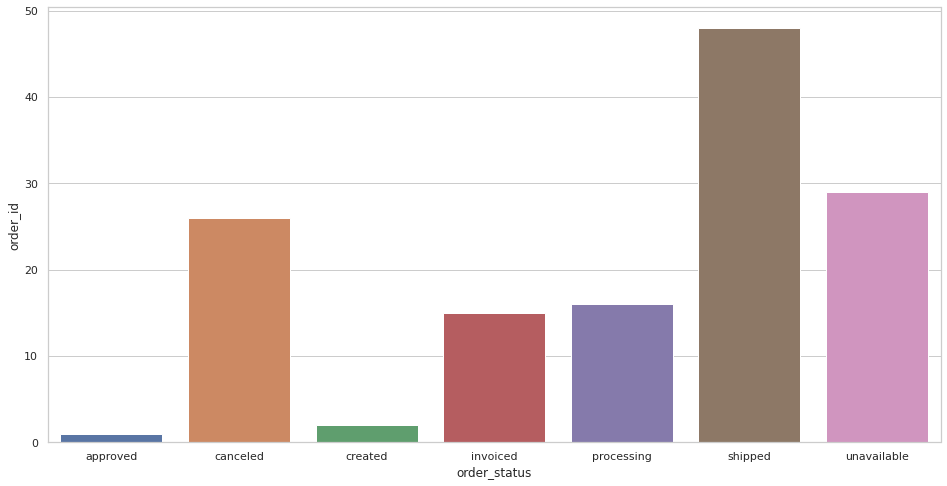

In [166]:
# Изобразим полученные данные на графике

sns.barplot(data=not_delivered, x='order_status', y='order_id');


####  ЗАДАНИЕ 3
 По каждому товару определить, в какой день недели товар чаще всего покупается?

In [167]:
# Для начала нам необходимо соединить данные по заказам и их содержимому

orders_with_items = orders.merge(order_items, on= 'order_id')
orders_with_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [168]:
# Проверим кол-во уникальных товаров

orders_with_items.product_id.nunique()

32951

In [169]:
# Создадим колонку с днями недели 

orders_with_items['day_of_week'] = orders_with_items.order_purchase_timestamp.dt.day_name()
orders_with_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [170]:
# Сгруппирвали таблицу по товарам и дням недели и посчитали кол-во записей в таблице,
# затем сделеи сводную таблицу и вытанули из нее самое популярное значение дня недели и получили результат

orders_with_items.groupby(['product_id','day_of_week'],as_index=False)\
                 .agg({'price':'count'})\
                 .pivot(index='product_id', columns='day_of_week', values='price')\
                 .idxmax(axis=1)\
                 .to_frame()\
                 .reset_index()\
                 .rename(columns={0:'most_popular_day'})

,product_id,most_popular_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


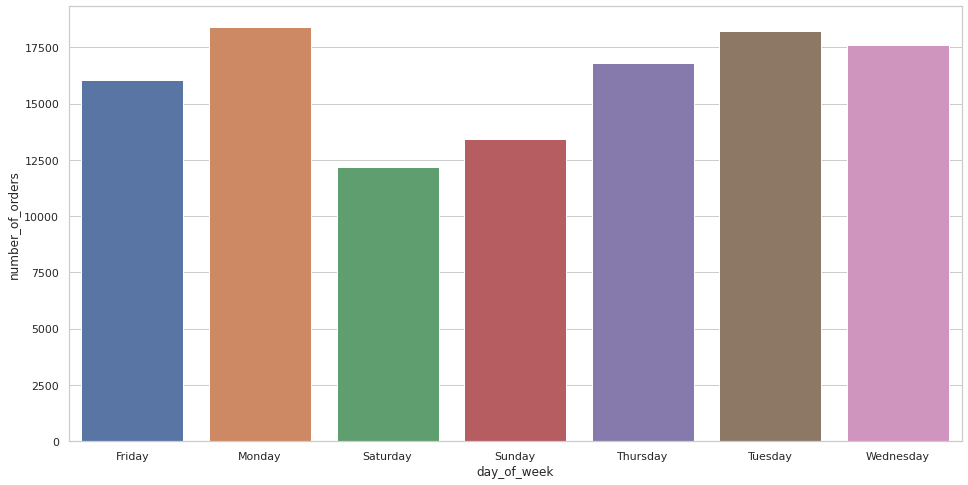

In [171]:
# Посмотрим на распределение всех покупок по дням недели

df1 = orders_with_items.groupby('day_of_week',as_index=False)\
                 .agg({'price':'count'})\
                 .rename(columns={'price':'number_of_orders'})
sns.barplot(data=df1, x='day_of_week', y='number_of_orders');


Наблюдаем, что в общем и целом покупки распределены равномерно по всем дням недели, однако, стоить заметить, что в выходные наблюдается снижение покупательской активности. Это неудивительно и можно аргументировать тем, что в выходные люди стараються отдыхать,проводить время на природе итд. А если и совершают покупки, то не онлайн, а оффлайн.

____

#### Задание 4
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [172]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [173]:
# Создадим новый столбец с количесвом недель 

customers_orders['weeks_in_month'] = customers_orders.order_purchase_timestamp.dt.daysinmonth/7
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,4.428571


In [174]:
customers_orders.weeks_in_month.describe()

count    99441.000000
mean         4.347938
std          0.124475
min          4.000000
25%          4.285714
50%          4.428571
75%          4.428571
max          4.428571
Name: weeks_in_month, dtype: float64

In [175]:
# Группируем данные по уникальным пользователям и кол-ву недель,считаем заказы и делим их на кол-во недель
# тем самым получая среднее кол-во заказов в неделю

purchase_per_week = customers_orders.query("order_status != 'unavailable' & order_approved_at != 'NaT'")\
                                    .groupby(['customer_unique_id', 'weeks_in_month'], as_index = False) \
                                    .agg({'order_purchase_timestamp': 'count'}) \
                                    .rename(columns={'order_purchase_timestamp':'total_orders'})
purchase_per_week['avg_purchase'] = purchase_per_week['total_orders'] / purchase_per_week['weeks_in_month']
purchase_per_week

,customer_unique_id,weeks_in_month,total_orders,avg_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,4.285714,1,0.233333
...,...,...,...,...
96509,fffcf5a5ff07b0908bd4e2dbc735a684,4.285714,1,0.233333
96510,fffea47cd6d3cc0a88bd621562a9d061,4.428571,1,0.225806
96511,ffff371b4d645b6ecea244b27531430a,4.000000,1,0.250000
96512,ffff5962728ec6157033ef9805bacc48,4.428571,1,0.225806


In [176]:
purchase_per_week.avg_purchase.describe()

count    96514.000000
mean         0.235336
std          0.038081
min          0.225806
25%          0.225806
50%          0.225806
75%          0.233333
max          2.935484
Name: avg_purchase, dtype: float64

____

#### Задание 5
Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Так как задание подразумевает анализ retantion rate с января по декабрь, для анализа будем использовать только 2017год.

In [177]:
# Оставим только те данные, котрые нам пригодятся для когортного анализа и приведем дату в формат год-месяц
df_cohorts = customers_orders[['customer_id','customer_unique_id','order_purchase_timestamp']]\
                             .query('"2016-12-31"<order_purchase_timestamp<"2018-01-01"')

df_cohorts['order_purchase_timestamp'] = df_cohorts.order_purchase_timestamp.dt.to_period('M')
df_cohorts

,customer_id,customer_unique_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,2017-09
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,2017-11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,2017-11
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,2017-09
...,...,...,...
99430,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,2017-05
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,2017-03
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,2017-12
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11


In [178]:
# создадим колонку с датой первой покупки 
first_purchase = df_cohorts.groupby('customer_unique_id', as_index=False)\
                           .order_purchase_timestamp.min()\
                           .rename(columns={'order_purchase_timestamp':'first_purchase'})
first_purchase

,customer_unique_id,first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07
...,...,...
43708,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12
43709,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
43710,fffea47cd6d3cc0a88bd621562a9d061,2017-12
43711,ffff371b4d645b6ecea244b27531430a,2017-02


In [179]:
# добавим колонку с датой первой покупки в датафрейм для когортного анализа 
df_cohorts = df_cohorts.merge(first_purchase,on='customer_unique_id')
df_cohorts

,customer_id,customer_unique_id,order_purchase_timestamp,first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09
2,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,2017-10,2017-09
3,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,2017-11,2017-11
4,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,2017-11,2017-11
...,...,...,...,...
45096,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,2017-05,2017-05
45097,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,2017-03,2017-03
45098,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,2017-12,2017-12
45099,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11


In [180]:
# сделаем табличку, показывающая количество уникальных клиентов,
# которые сделали первую покупку в первый ммесяц и в другие меясаца

coh_pur = df_cohorts.groupby(['first_purchase','order_purchase_timestamp'],as_index=False)\
                    .agg({'customer_unique_id':'nunique'})\
                    .rename (columns = {'customer_unique_id':'uniq_clients'})
coh_pur

,first_purchase,order_purchase_timestamp,uniq_clients
0,2017-01,2017-01,765
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
72,2017-10,2017-11,31
73,2017-10,2017-12,11
74,2017-11,2017-11,7305
75,2017-11,2017-12,40


In [181]:
# теперь посчитаем количесво уник клиентов в группировке только по первому месяцу покупки

first_buy = df_cohorts.groupby('first_purchase',as_index=False)\
                      .agg({'customer_unique_id':'nunique'})\
                      .rename(columns={'customer_unique_id':'uniq_cust_first_buy'})
first_buy

,first_purchase,uniq_cust_first_buy
0,2017-01,765
1,2017-02,1752
2,2017-03,2636
3,2017-04,2353
4,2017-05,3596
5,2017-06,3139
6,2017-07,3895
7,2017-08,4184
8,2017-09,4131
9,2017-10,4470


In [182]:
# соединим две минитаблицы полученные ранее и получим наш финальный набор для расчета reteantion 

cohorts_final = coh_pur.merge(first_buy, on='first_purchase')\
                       .rename(columns={'order_purchase_timestamp':'other_purchases'})
cohorts_final

,first_purchase,other_purchases,uniq_clients,uniq_cust_first_buy
0,2017-01,2017-01,765,765
1,2017-01,2017-02,3,765
2,2017-01,2017-03,2,765
3,2017-01,2017-04,1,765
4,2017-01,2017-05,3,765
...,...,...,...,...
72,2017-10,2017-11,31,4470
73,2017-10,2017-12,11,4470
74,2017-11,2017-11,7305,7305
75,2017-11,2017-12,40,7305


In [183]:
# считаем RR и переводим этот показатель сразу в проценты

cohorts_final['RR'] = round((cohorts_final['uniq_clients'] / cohorts_final['uniq_cust_first_buy'] * 100),2)
cohorts_final

,first_purchase,other_purchases,uniq_clients,uniq_cust_first_buy,RR
0,2017-01,2017-01,765,765,100.00
1,2017-01,2017-02,3,765,0.39
2,2017-01,2017-03,2,765,0.26
3,2017-01,2017-04,1,765,0.13
4,2017-01,2017-05,3,765,0.39
...,...,...,...,...,...
72,2017-10,2017-11,31,4470,0.69
73,2017-10,2017-12,11,4470,0.25
74,2017-11,2017-11,7305,7305,100.00
75,2017-11,2017-12,40,7305,0.55


In [184]:
# cделаем сводную таблицы для того чтобы увидеть для какого месяца первой покупки RR максимальный на 3-й месяц

cohort_pivot = cohorts_final.pivot(index = 'first_purchase', columns = 'other_purchases', values='RR')
cohort_pivot

other_purchases,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
first_purchase,,,,,,,,,,,,
2017-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13
2017-02,NaN,100.00,0.23,0.29,0.11,0.40,0.11,0.23,0.17,0.17,0.23,0.11
2017-03,NaN,NaN,100.00,0.49,0.38,0.38,0.34,0.15,0.15,0.30,0.34,0.08
2017-04,NaN,NaN,NaN,100.00,0.59,0.21,0.17,0.34,0.25,0.34,0.30,0.30
2017-05,NaN,NaN,NaN,NaN,100.00,0.50,0.50,0.39,0.31,0.33,0.42,0.17
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.35,0.41,0.25,0.38,0.38
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.51,0.36,0.26,0.28,0.21
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.69,0.33,0.26,0.36
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.68,0.53,0.29


Text(0.5, 1.0, 'Cohorts Analysis')

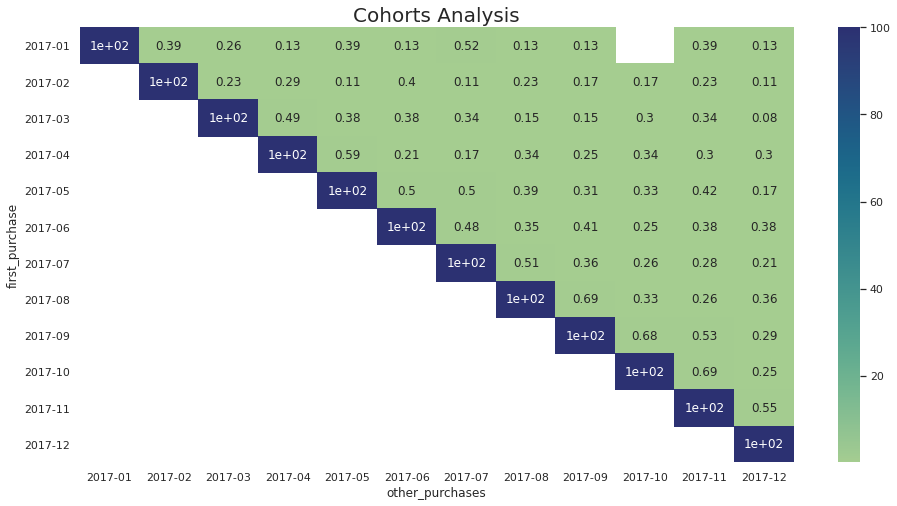

In [185]:
# для более наглядной визуализации используем heatmap

plt.figure(figsize=(16, 8))
ax = sns.heatmap(cohort_pivot, annot=True, cmap='crest')
ax.set_title('Cohorts Analysis', fontsize=20)


Таким образом мы выяснили что максимальный RR на 3-й месяц у нас у когорты покупателей совершивших первую покупку 2017-06 - 0.41
Стоит отметить, что общий RR крайне низкий

____

#### ЗАДАНИЕ 6
Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [186]:
# Предварительный фрейм для RFM анализа 
df_for_RFM = customers_orders.merge(order_items, on = 'order_id')\
                             .query('order_approved_at != "NaT"')
df_for_RFM = df_for_RFM[['customer_unique_id','order_id','order_purchase_timestamp','price']]
df_for_RFM

,customer_unique_id,order_id,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00
...,...,...,...,...
112645,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90
112646,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90
112647,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00
112648,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00


In [187]:
# Дата последней покупки
last_purchase_date = df_for_RFM.groupby('customer_unique_id',as_index=False)\
                               .agg({'order_purchase_timestamp':'max'})\
                               .rename(columns={'order_purchase_timestamp':'last_purchase_date'})
last_purchase_date

,customer_unique_id,last_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95403,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95404,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95405,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [188]:
# добавляем дату последней покупки в наш фрейм 
df_for_RFM_1 = df_for_RFM.merge(last_purchase_date,on='customer_unique_id')
df_for_RFM_1

,customer_unique_id,order_id,order_purchase_timestamp,price,last_purchase_date
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,2018-07-29 09:51:30
...,...,...,...,...,...
112630,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90,2018-04-07 15:48:17
112631,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90,2018-04-04 08:20:22
112632,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00,2018-04-08 20:11:50
112633,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00,2017-11-03 21:08:33


In [189]:
# последняя дата в наших данных 
max_date = df_for_RFM_1.order_purchase_timestamp.max()
max_date

Timestamp('2018-09-03 09:06:57')

In [190]:
# считаем количесво дней прошедших со дня последней покупки 
df_for_RFM_1['days_since_last_purchase'] = (max_date-df_for_RFM_1.last_purchase_date).dt.days
df_for_RFM_1

,customer_unique_id,order_id,order_purchase_timestamp,price,last_purchase_date,days_since_last_purchase
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,2017-05-16 15:05:35,474
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,2018-01-12 20:48:24,233
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,2018-05-19 16:07:45,106
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,2018-03-13 16:06:38,173
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,2018-07-29 09:51:30,35
...,...,...,...,...,...,...
112630,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90,2018-04-07 15:48:17,148
112631,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90,2018-04-04 08:20:22,152
112632,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00,2018-04-08 20:11:50,147
112633,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00,2017-11-03 21:08:33,303


In [191]:
# считаем количесво покупок и их сумму для каждого пользователя 
RFM = df_for_RFM_1.groupby('customer_unique_id',as_index=False)\
                  .agg({'order_id':'count','price':'sum'})\
                  .rename(columns={'order_id':'number_of_purchases','price':'total_revenue_per_customer'})
RFM

,customer_unique_id,number_of_purchases,total_revenue_per_customer
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90
2,0000f46a3911fa3c0805444483337064,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,180.00
...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,1,89.90
95405,ffff5962728ec6157033ef9805bacc48,1,115.00


In [192]:
# дата последней покупки для каждого уникального покупателя 
last_buy_per_cust = df_for_RFM_1.groupby('customer_unique_id',as_index=False).agg({'days_since_last_purchase':'min'})

In [193]:
# окончательный фрейм для нашего анализа 
RFM_final = RFM.merge(last_buy_per_cust, on = 'customer_unique_id')\
               .rename(columns={'number_of_purchases':'frequency',
                                'total_revenue_per_customer':'monetary',
                                'days_since_last_purchase':'recency'})
RFM_final

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118
2,0000f46a3911fa3c0805444483337064,1,69.00,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451
95403,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266
95404,ffff371b4d645b6ecea244b27531430a,1,89.90,572
95405,ffff5962728ec6157033ef9805bacc48,1,115.00,123


In [194]:
RFM_final.dtypes

customer_unique_id     object
frequency               int64
monetary              float64
recency                 int64
dtype: object

In [195]:
# Посмотрим распределение по квантилям в интересующих наш колонках 
RFM_final[['frequency','monetary','recency']].quantile([.2, .4, .6, .8])

,frequency,monetary,recency
0.2,1.0,39.9,97.0
0.4,1.0,69.9,181.0
0.6,1.0,109.9,272.0
0.8,1.0,179.9,388.0


In [196]:
RFM_final.frequency.value_counts()

1     83540
2      8994
3      1672
4       632
5       254
6       198
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: frequency, dtype: int64

В виду того, что подавляющее большинсво покупателей сделаи 1 и 2 покупки соответсвенно,
f score будем назначать следующим образом: 1 покупка - 3, 2 покупки - 2 , >2 покупок - 1.

Так как f score будет иметь 3 градации, то R score и M score тоже разобьем на три градации для удобства 

In [197]:
RFM_final[['monetary','recency']].quantile([.33, .66])

,monetary,recency
0.33,57.99,152.0
0.66,125.00,291.0


In [198]:
def f_score(f):
    '''Функция f_score принимает на вход один параметр-количесво покупок 
       и возвращает F_score в зависимости от количества покупок '''
    if f == 1:
        return 3
    elif f == 2:
        return 2
    elif f > 2:
        return 1

In [199]:
def r_score(r):
    '''Функция r_score принимает на вход один параметр-количесво дней
       прошедших с последней покупки пользователя 
       и возвращает r_score в зависимости от количества дней'''
    if r > 291:
        return 3
    elif 152 <= r <= 291:
        return 2
    elif r < 152:
        return 1

In [200]:
def m_score(m):
    '''Функция m_score принимает на вход один параметр-cумму которую клиент у нас потратил
       и возвращает m_score в зависимости от этой суммы'''
    if m < 57.99:
        return 3
    elif 57.99 <= m <= 125:
        return 2
    elif m > 125:
        return 1

In [201]:
# Применяем наши функции к нужным колонкам 
RFM_final['R'] = RFM_final.recency.apply(r_score)
RFM_final['F'] = RFM_final.frequency.apply(f_score)
RFM_final['M'] = RFM_final.monetary.apply(m_score)

In [202]:
RFM_final

,customer_unique_id,frequency,monetary,recency,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,1,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,1,3,3
2,0000f46a3911fa3c0805444483337064,1,69.00,541,3,3,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,3,3,3
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,3,3,1
...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451,3,2,1
95403,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266,2,3,2
95404,ffff371b4d645b6ecea244b27531430a,1,89.90,572,3,3,2
95405,ffff5962728ec6157033ef9805bacc48,1,115.00,123,1,3,2


In [203]:
# Приводим колонки к типу str и конкатенируем их для получеия RFM score
RFM_final['R'] = RFM_final.R.astype(str)
RFM_final['F'] = RFM_final.F.astype(str)
RFM_final['M'] = RFM_final.M.astype(str)
RFM_final['RFM'] = RFM_final.R + RFM_final.F + RFM_final.M

In [204]:
RFM_final

,customer_unique_id,frequency,monetary,recency,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,1,3,1,131
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,1,3,3,133
2,0000f46a3911fa3c0805444483337064,1,69.00,541,3,3,2,332
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,3,3,1,331
...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451,3,2,1,321
95403,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266,2,3,2,232
95404,ffff371b4d645b6ecea244b27531430a,1,89.90,572,3,3,2,332
95405,ffff5962728ec6157033ef9805bacc48,1,115.00,123,1,3,2,132


Лучшим сегментом для нас явялетсю те у кого RFM - 111. Это те покупатели которые купили недвано, количество покупок больше 2 и сумма покупок больше 125 

In [205]:
# Посмотрим на распределение по сегментам 
RFM_final.RFM.value_counts()

233    10185
333    10038
133     9697
332     9664
132     9317
232     9031
331     8709
231     8495
131     8404
121     1612
221     1612
321     1408
322     1079
222      981
122      971
111      727
211      694
311      671
323      512
123      415
223      404
212      201
112      199
312      198
113       64
213       60
313       59
Name: RFM, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



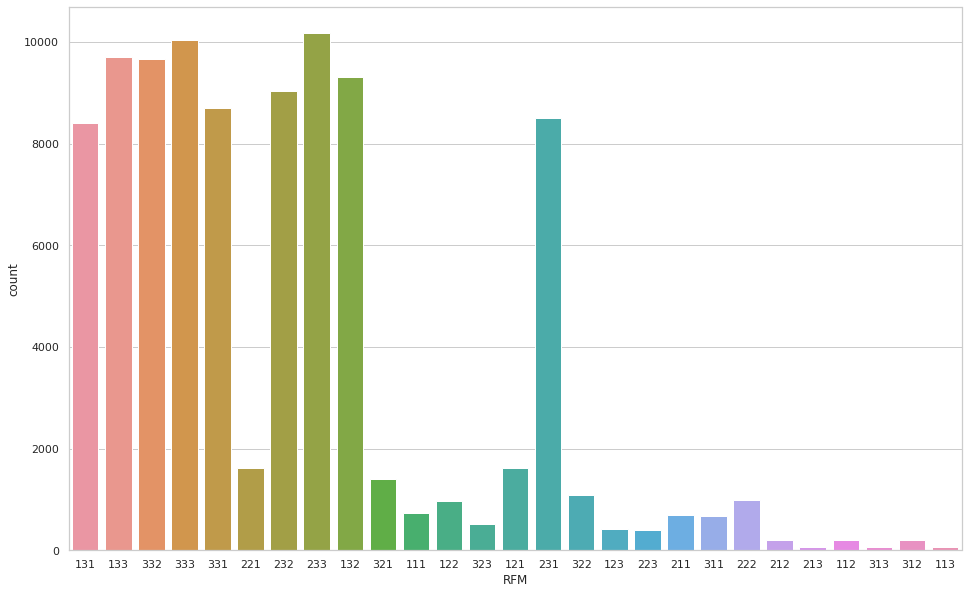

In [206]:
# визулизируем распределенеи для большей наглядности.

plt.figure(figsize = (16, 10))
sns.countplot(RFM_final.RFM);

Можно было бы сделать больше визуализаций и присвоить каждому сегменту имя по типу "Постоянный клиент", "Потенциально постоянный", "В зоне иска" и так далее , как это сделанно в статье Гийома Мартена прикрепленной к заданию, но я считаю, что в наших данных это не совсем уместно так как подавляющее большинсво покупателей совершили 1 и 2 покупки соотвественно. 

____

На основе проведеного анализа можно предположить, что магазин реализует продукцию разового или долгосрочного использования. 
Для того, чтобы делить покупателей на какие то более конкретные сегменты и отталкиваясь от этих сегментов выстраивать маркетинговую политику и политику взаимоотношений с нашими клиентами нам нужны данные либо за больший период либо описание товаров,котрые реализует магазин.